### Import Library

In [1]:
from lib.MLP import *
from lib.graph import draw_dot
from lib.graph import draw_mlp
import random


import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


### Mnist Scikit

#### Log Regression

In [ ]:
# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)


#Ngebantu ngacak urutan data, biar gk bias ke 0 soalnya mnist ngurut
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))




In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000
)

In [ ]:
print(f"Shape X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Shape X_test: {X_test.shape}, y_test: {y_test.shape}")

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Turn up tolerance for faster convergence
clf = LogisticRegression()
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

In [ ]:
import matplotlib.pyplot as plt

plt.hist(clf.coef_[0], bins=20)
plt.xlabel("Coefficient Value")
plt.ylabel("Frequency")
plt.title("Distribution of Coefficients")
plt.show()

In [ ]:
coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(
        coef[i].reshape(28, 28),
        interpolation="nearest",
        cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale,
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel("Class %i" % i)
plt.suptitle("Classification vector for...")

run_time = time.time() - t0
print("Example run in %.3f s" % run_time)
plt.show()

#### MLP Scikit

In [ ]:
# Load MNIST dari OpenML
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

In [ ]:
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))
# Normalisasi (scaling agar lebih stabil)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data menjadi training & testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Buat model MLP
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam',
                    alpha=0.001, max_iter=20, random_state=42)

# Training model
mlp.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = mlp.predict(X_test)


In [ ]:
# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model MLP: {accuracy:.4f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
sample_idx = 2
sample_image = X_test[sample_idx].reshape(1, -1)  # Ambil satu sample
proba = mlp.predict_proba(sample_image)[0]  # Ambil probabilitas dari output
proba

In [ ]:
# Pilih satu gambar uji
sample_idx = 2
sample_image = X_test[sample_idx].reshape(1, -1)  # Ambil satu sample
proba = mlp.predict_proba(sample_image)[0]  # Ambil probabilitas dari output

# Plot Probabilitas Output
plt.bar(range(10), proba)
plt.xlabel("Digit (0-9)")
plt.ylabel("Probabilitas")
plt.title("Probabilitas Prediksi Model MLP Sklearn")
plt.show()


### Implementation Scratch

#### MNIST

In [ ]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

##### Random Samples

In [ ]:
train_samples = 2000
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))
X = X / 255.0


X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=500
)
encoder = OneHotEncoder(sparse_output=False)
y_train_encode = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encode = encoder.transform(y_test.reshape(-1, 1))
input_layer = X_train.shape[1]  # 784

output_layer = 10  # MNIST punya 10 kelas (0-9)
print(f"Shape X_train: {X_train.shape}, y_train: {y_train_encode.shape}")
print(f"Shape X_test: {X_test.shape}, y_test: {y_test_encode.shape}")

##### Selected Samples

In [ ]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
X = X / 255.0
random_state = check_random_state(0)
y = y.astype(int)

samples_per_class = 100
selected_indices = []

for digit in range(10):
    indices = np.where(y == digit)[0]  
    chosen = random_state.choice(indices, samples_per_class, replace=False)  
    selected_indices.extend(chosen)

X_train = X[selected_indices]
y_train = y[selected_indices]

encoder = OneHotEncoder(sparse_output=False)
y_train_encode = encoder.fit_transform(y_train.reshape(-1, 1))

print(f"Shape X_train: {X_train.shape}, y_train: {y_train_encode.shape}")
print("Jumlah sampel per kelas:", {i: np.sum(y_train == i) for i in range(10)})
input_layer = X_train.shape[1] 
output_layer = 10  


##### Reducted Image

In [32]:

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
X = X / 255.0
y = y.astype(int)
samples_per_class = 200
X_selected, _, y_train, _ = train_test_split(
    X, y, train_size=samples_per_class * 10, stratify=y, random_state=0
)
X_train = np.array([zoom(img.reshape(28, 28), zoom=0.5).flatten() for img in X_selected])
encoder = OneHotEncoder(sparse_output=False)
y_train_encode = encoder.fit_transform(y_train.reshape(-1, 1))
print(f"Shape X_train: {X_train.shape}, y_train: {y_train_encode.shape}")  
print("Jumlah sampel per kelas:", {i: np.sum(y_train == i) for i in range(10)})

input_layer = X_train.shape[1] 
output_layer = 10  


Shape X_train: (2000, 196), y_train: (2000, 10)
Jumlah sampel per kelas: {0: np.int64(197), 1: np.int64(225), 2: np.int64(200), 3: np.int64(204), 4: np.int64(195), 5: np.int64(180), 6: np.int64(197), 7: np.int64(208), 8: np.int64(195), 9: np.int64(199)}


In [33]:
layer_f_activations = [
  [8, 'relu'], 
  [4, 'relu'], 
  [output_layer, 'softmax'] 
]
weight = Weight("uniform", 42, input_layer, lower=-1, upper=1)
biasW = Weight("uniform", 42, input_layer, lower=1, upper=1)
n = MLP(input_layer, [n[0] for n in layer_f_activations], activations=[n[1] for n in layer_f_activations], weight=weight,biasW=biasW)

sz:  [196, 8, 4, 10]


In [34]:
n.fit_minibatch(x=X_train, y=y_train_encode, epoch=2, lossfunc="CCE", learning_rate=0.1, batch_size=128)

Epoch 2/2 - Backpropagating: 100%|██████████| 2/2 [04:19<00:00, 129.81s/epoch, Train Loss=0.0224]                   


inputx : 196 MLP of [Layer of [ReluNeuron(196), ReluNeuron(196), ReluNeuron(196), ReluNeuron(196), ReluNeuron(196), ReluNeuron(196), ReluNeuron(196), ReluNeuron(196)], Layer of [ReluNeuron(196), ReluNeuron(196), ReluNeuron(196), ReluNeuron(196)], Layer of [SoftmaxNeuron(196), SoftmaxNeuron(196), SoftmaxNeuron(196), SoftmaxNeuron(196), SoftmaxNeuron(196), SoftmaxNeuron(196), SoftmaxNeuron(196), SoftmaxNeuron(196), SoftmaxNeuron(196), SoftmaxNeuron(196)]]

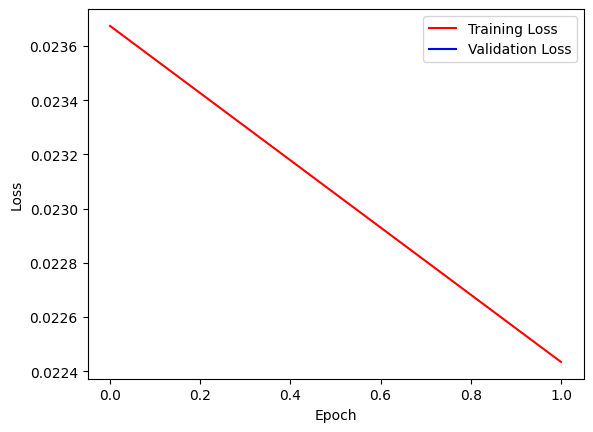

In [35]:
n.plot_loss()

In [ ]:
n.save(filepath="tes.pkl")

In [36]:
import numpy as np

correct_predictions = 0
total_samples = len(X_train)

for i in range(total_samples):
    sample_vector = X_train[i].reshape(1, -1)  
    ypred = n.predict(sample_vector)  

    proba = [y_i.data for y in ypred for y_i in y]
    predicted_class = np.argmax(proba) 

    if predicted_class == y_train[i]:
        correct_predictions += 1
        print(i)

accuracy = (correct_predictions / total_samples) * 100
print(f"acc: {accuracy:.2f}% ({correct_predictions}/{total_samples})")


28
35
51
63
84
88
100
139
150
176
181
182
183
198
215
220
242
258
303
333
364
380
400
403
412
424
447
451
458
469
485
521
529
536
557
607
620
637
665
667
705
713
721
731
741
816
819
831
851
859
868
875
896
901
918
924
939
941
948
949
951
959
980
989
997
1005
1011
1022
1024
1065
1099
1101
1111
1113
1125
1130
1132
1135
1151
1193
1205
1210
1241
1244
1247
1278
1280
1313
1315
1337
1354
1370
1374
1375
1379
1403
1409
1436
1441
1452
1501
1508
1580
1586
1605
1614
1619
1648
1670
1692
1697
1720
1769
1789
1802
1849
1851
1856
1890
1937
1944
1961
1964
1966
1994
acc: 6.25% (125/2000)


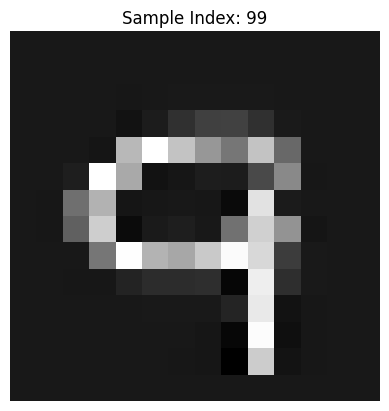

proba terbesar:  6.675107300085643e-05
proba terbesar:  6.675107300085643e-05
proba terbesar:  0.005168004841913329
proba terbesar:  0.005168004841913329
proba terbesar:  0.005168004841913329
proba terbesar:  0.0059626286623118835
proba terbesar:  0.01958157329606952
proba terbesar:  0.01958157329606952
proba terbesar:  0.021810514139948802
proba terbesar:  0.9471445739616218


In [26]:

sample_idx =99
sample_image = X_train[sample_idx].reshape(14, 14) 
plt.imshow(sample_image, cmap="gray")
plt.title(f"Sample Index: {sample_idx}")
plt.axis("off")  
plt.show()
sample_image = X_train[sample_idx].reshape(1, -1) 
ypred = n.predict(sample_image)
proba = []
for y in ypred:
    for y_i in y:
        proba.append(y_i.data)
        print("proba terbesar: ", max(proba))

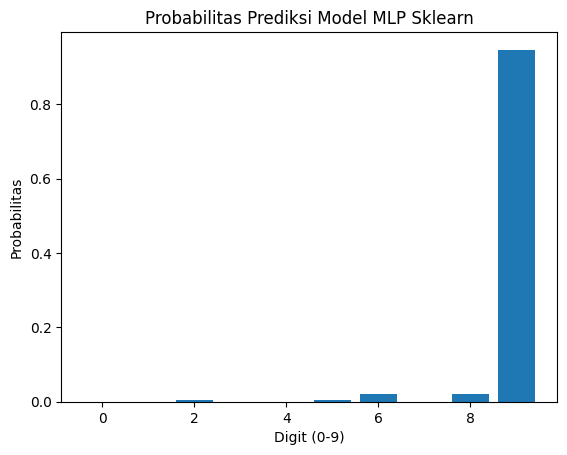

In [ ]:
plt.bar(range(10),proba )
plt.xlabel("dig")
plt.ylabel("prob")
plt.show()

#### Random Testing

In [ ]:
input_layer = 100
output_layer = 10
batch_size = 50
np.random.seed(42)
x = np.random.uniform(-2,2,(batch_size,input_layer))
y= np.random.uniform(0,2,(batch_size,output_layer))



X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=42)
print("Training X shape:", X_train.shape)
print("Validation Y shape:", y_val.shape)


In [ ]:
input_layer = 10
output_layer = 10
batch_size = 100

np.random.seed(42)
X = np.random.normal(loc=0.5, scale=0.2, size=(batch_size, input_layer))  

y_labels = np.random.randint(0, output_layer, size=batch_size).reshape(-1, 1)  
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y_labels)  

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training X shape:", X_train.shape)
print("Validation X shape:", X_val.shape)
print("Training Y shape:", y_train.shape)
print("Validation Y shape:", y_val.shape)
print("Contoh y_train:", y_train[:5])  


In [ ]:
layer_f_activations = [
  [8,'relu'],
  [4,'relu'],
  [output_layer,'softmax']
]
weight = Weight("uniform", 42, input_layer, lower=-1, upper=1)
biasW = Weight("uniform", 42, input_layer, lower=-0.1, upper=0.1)

#kalau mau ada history valid  loss, masukin y_val dan x_val
n = MLP(input_layer,[n[0] for n in layer_f_activations],activations=[n[1] for n in layer_f_activations],weight=weight,biasW=biasW)


In [ ]:
n.fit(x=X_train,y = y_train ,epoch=20,lossfunc="CCE",learning_rate=0.1)

In [ ]:
n.plot_W_distribution(1)

In [ ]:
n.parameters()

In [ ]:
n.fit_minibatch(x=X_train, y=y_train, epoch=20, lossfunc="CCE", learning_rate=0.1, batch_size=10)

In [ ]:
n.plot_W_distribution(1)

In [ ]:
n.parameters()

In [ ]:
n.plot_loss()

In [ ]:
draw_mlp(n)

In [ ]:
draw_dot(mse).render("graph_output.dot",view = True)

In [ ]:
print(mse._prev)

In [ ]:
draw_mlp(n).render("mlp.dot",view= True)
